In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import EngFormatter
fmt = EngFormatter(places=0)
sns.set_theme(style="dark")

%matplotlib inline

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies['genre 1'] = np.nan
movies['genre 2'] = np.nan
movies['genre 3'] = np.nan
movies['genre 4'] = np.nan
movies['genre 5'] = np.nan
movies['genre 6'] = np.nan
movies['genre 7'] = np.nan

In [4]:
def create_genres(movie):
    genres = eval(movie['genres'])
    for i, gen in enumerate(genres):
        movie.loc[f'genre {i+1}'] = gen['name']
    return movie

movies = movies.apply(lambda x: create_genres(x), axis=1)
# a = eval(movies.loc[0]['genres'])
# a = eval(movies.loc[0]['genres'][1:29])


In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,Action,Adventure,Fantasy,Science Fiction,NaN,NaN,NaN
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,Adventure,Fantasy,Action,NaN,NaN,NaN,NaN
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,Action,Adventure,Crime,NaN,NaN,NaN,NaN
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,7.6,9106,Action,Crime,Drama,Thriller,NaN,NaN,NaN
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,6.1,2124,Action,Adventure,Science Fiction,NaN,NaN,NaN,NaN


In [6]:
# movies.columns

genre_list = ['genre 1', 'genre 2', 'genre 3', 'genre 4', 'genre 5',
       'genre 6', 'genre 7']

# # genres_sum = movies['genre 1']
# pd.concat(movies[[genre_list]], axis=1)
# type(movies[genre_list])
# for genre in genre_list[1:]:
#     genres_sum = genres_sum.concat(movies[genre])
    
# len(genres_sum)
# pd.concat()

In [7]:
genres_sum = movies[genre_list].melt().dropna()['value']


Text(0.5, 1.0, 'Number of movies per genre for top 20 genres')

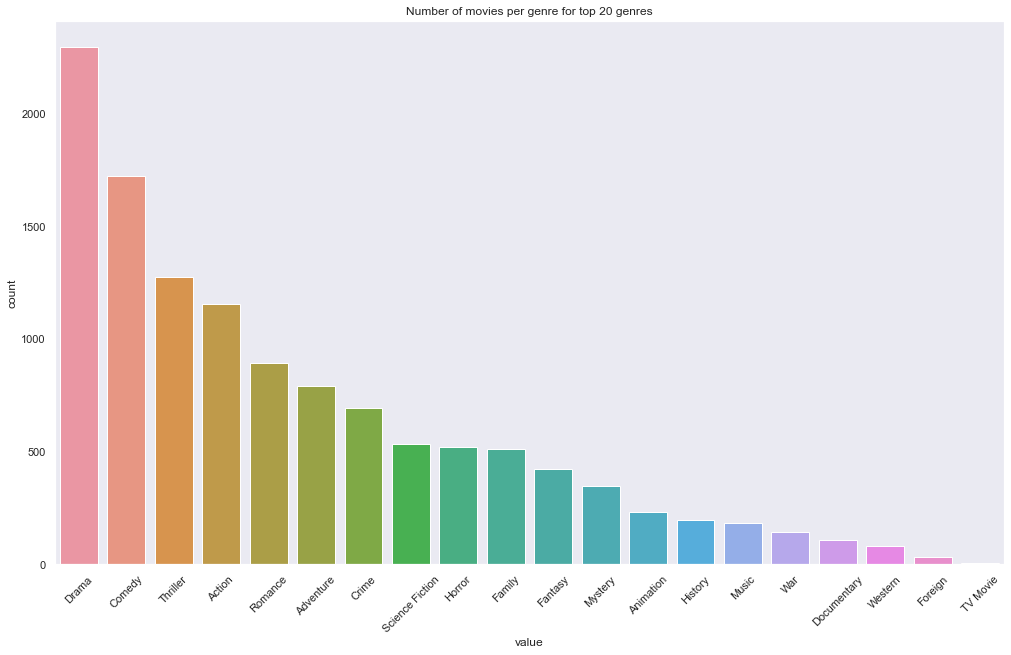

In [8]:
fig, axs = plt.subplots(figsize=(17,10))
sns.countplot(x=genres_sum,order=genres_sum.value_counts().index)
axs.tick_params(axis='x', rotation=45)
axs.set_title('Number of movies per genre for top 20 genres')
# genres_sum

In [9]:
credits.drop('title',axis=1,inplace=True)
credits.rename({"movie_id":"id"},inplace=True,axis=1)
df = pd.merge(movies,credits,on='id')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_15884\823180860.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='plasma_r')


<AxesSubplot:>

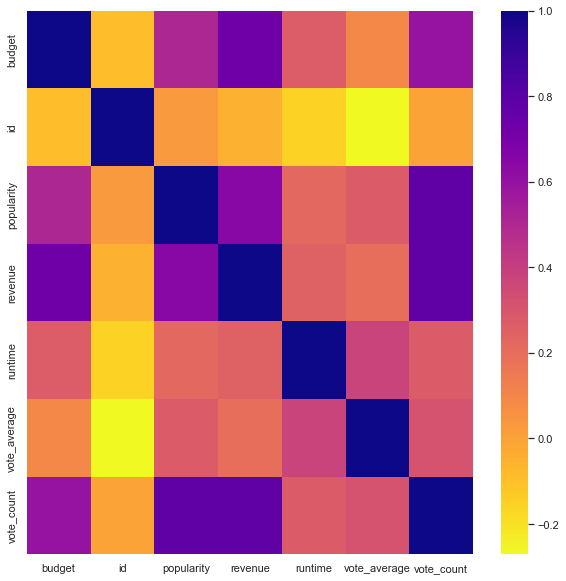

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='plasma_r')

Text(0.5, 1.0, 'Budget KDE plot')

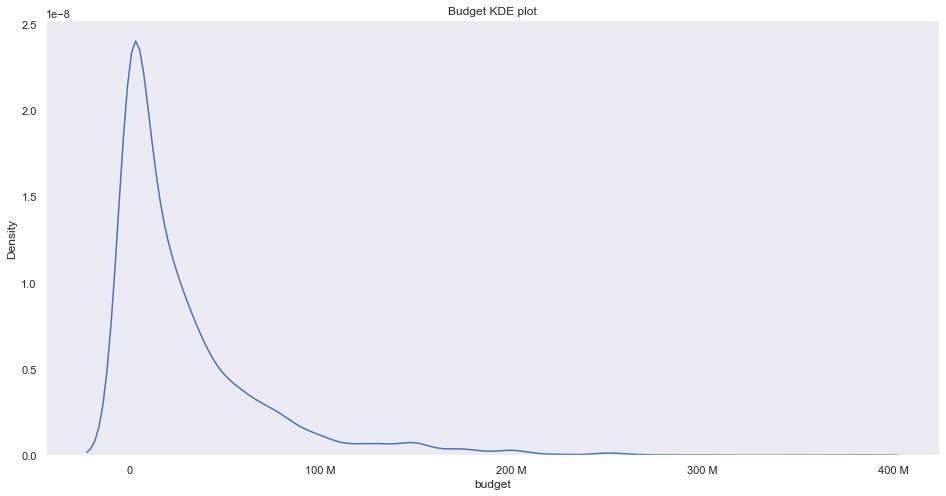

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.kdeplot(data=movies,x='budget')
ax.xaxis.set_major_formatter(fmt)
ax.set_title('Budget KDE plot')

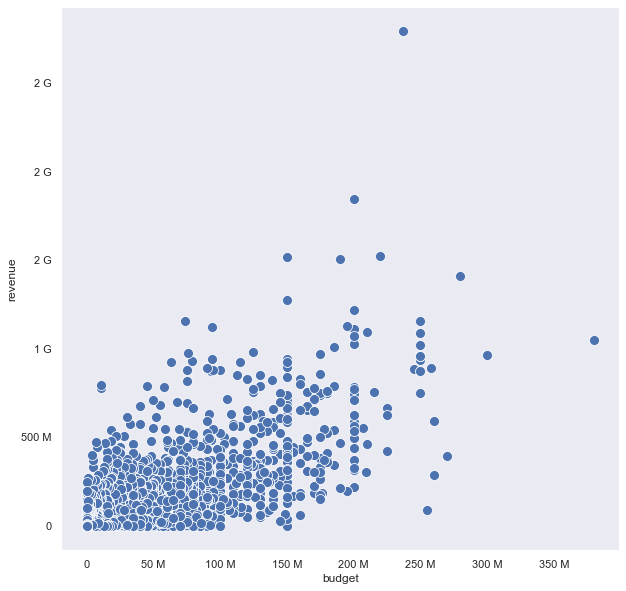

In [12]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=movies, x='budget', y='revenue', s=100)
ax.xaxis.set_major_formatter(fmt)
ax.yaxis.set_major_formatter(fmt)

Text(0.5, 1.0, 'Vote average')

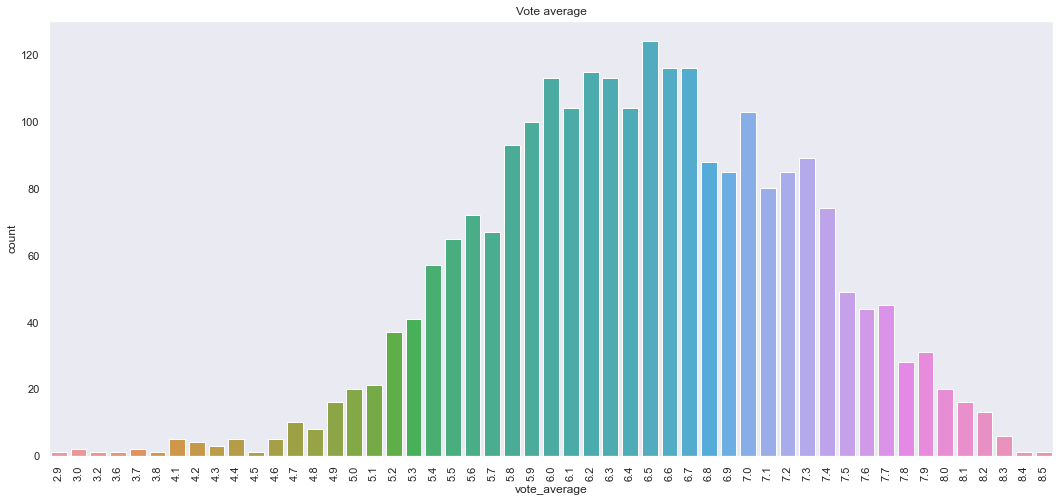

In [13]:
# df['vote_count'][1]>100
fig, ax = plt.subplots(figsize=(18,8))
votes = df[df['vote_count']>df['vote_count'].median()][genre_list+['id','vote_average']].sort_values(by='vote_average', ascending=False)
sns.countplot(data=votes,x='vote_average')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Vote average')
# df[df['vote_count']>100]

In [14]:
votes.head()
drama_votes = votes[votes.apply(lambda x: x.isin(['Drama']).any(),axis=1)==True]
comedy_votes = votes[votes.apply(lambda x: x.isin(['Comedy']).any(),axis=1)==True]
thriller_votes = votes[votes.apply(lambda x: x.isin(['Thriller']).any(),axis=1)==True]
horror_votes = votes[votes.apply(lambda x: x.isin(['Horror']).any(),axis=1)==True]

Text(0.5, 1.0, 'KDE for vote average for 4 movie genres')

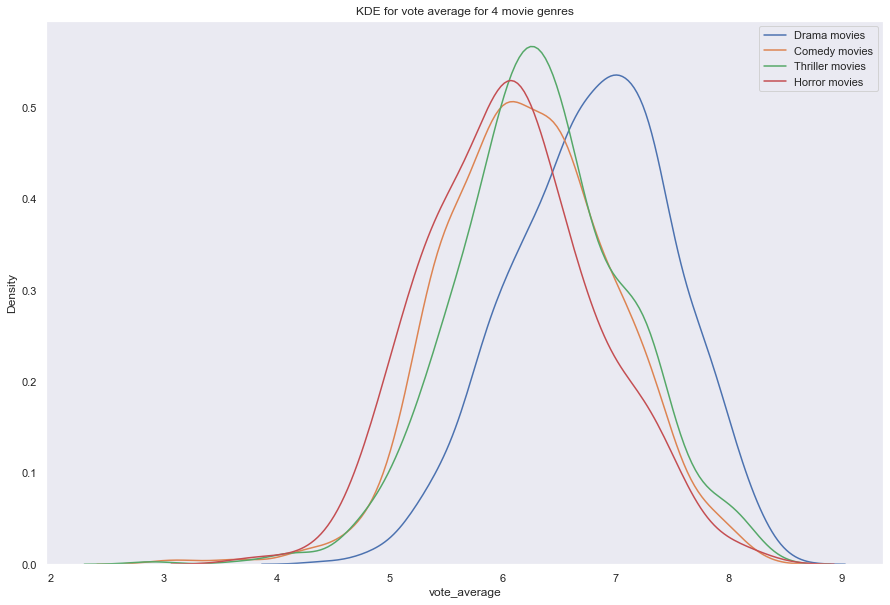

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(drama_votes['vote_average'])
sns.kdeplot(comedy_votes['vote_average'])
sns.kdeplot(thriller_votes['vote_average'])
sns.kdeplot(horror_votes['vote_average'])
plt.legend(labels=['Drama movies','Comedy movies','Thriller movies','Horror movies'])
plt.title('KDE for vote average for 4 movie genres')

<Figure size 1224x432 with 0 Axes>

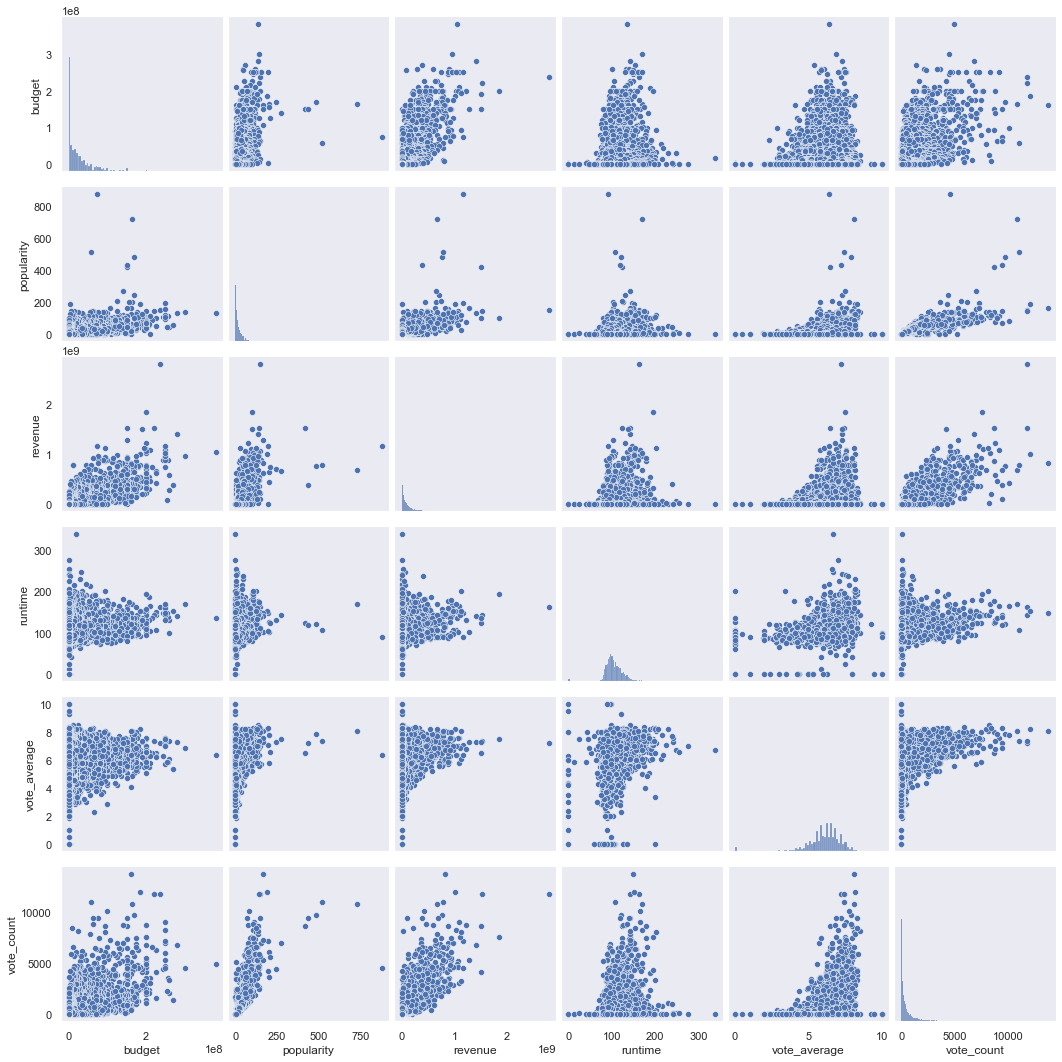

In [16]:
plt.figure(figsize=(17,6))
# sns.scatterplot(x=df['vote_count'],y=df['vote_average'])
sns.pairplot(data=df.drop('id',axis=1))

<AxesSubplot:xlabel='runtime', ylabel='vote_average'>

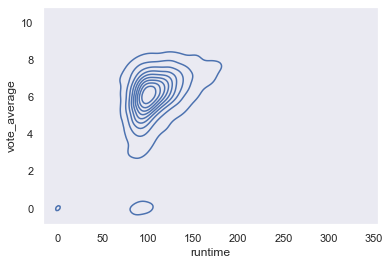

In [17]:
sns.kdeplot(data=df, x='runtime',y='vote_average')

Text(0.5, 1.0, 'Number of movies for each language')

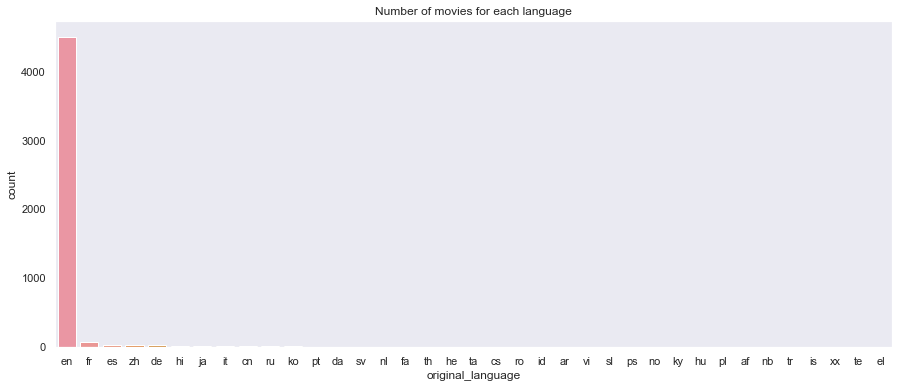

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='original_language', order=df['original_language'].value_counts().index)
plt.title('Number of movies for each language')

In [19]:
df = df[df['original_language']=='en']

In [20]:
# a = eval(df[df['id']==22215]['production_companies'].iloc[0])
# eval(a.iloc[0])
def create_prod_comps(movie):
    prods = eval(movie['production_companies'])
    for i, comp in enumerate(prods):
        movie.loc[f'prod {i+1}'] = comp['name']
    return movie

df_prods = movies.apply(lambda x: create_prod_comps(x), axis=1)

In [21]:
prod_list = [f'prod {i}' for i in range(1,27)]
number_of_prod_comps = (~df_prods[prod_list].isnull()).sum(axis=1)

Text(0.5, 1.0, 'Average number of production companies per movie')

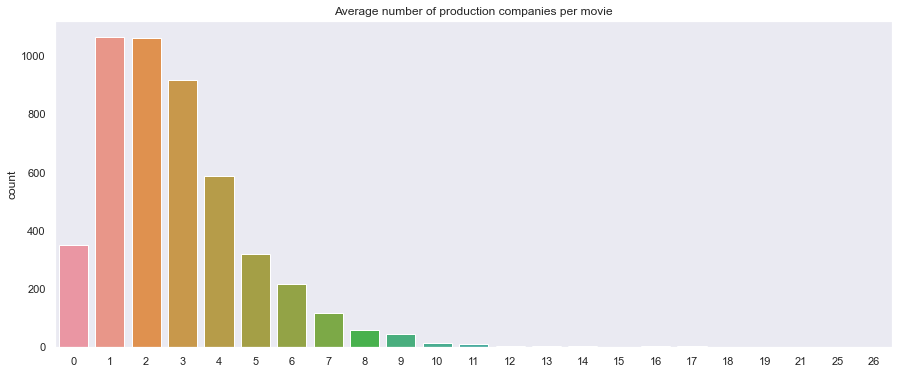

In [22]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x=number_of_prod_comps)
number_of_prod_comps.mean()
plt.title('Average number of production companies per movie')

In [23]:
df_prods[df_prods['prod 1'].isnull()==True].head()

,budget,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,genres,homepage,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1011,0,Horror,NaN,NaN,NaN,NaN,NaN,NaN,"[{""id"": 27, ""name"": ""Horror""}]",NaN,...,[],2006-08-08,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,The Tooth Fairy,4.3,13
1360,0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://therebedragonsmovie.com/,...,[],2011-03-25,0,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,There Be Dragons,5.9,27
1669,0,Fantasy,Drama,Action,Thriller,Romance,NaN,NaN,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...",http://thepromisemovie.net,...,"[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2005-12-15,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,the promise,The Promise,5.0,29
1754,27000000,Adventure,Comedy,Drama,Family,NaN,NaN,NaN,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",NaN,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-08-06,44352417,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some friends just fit together.,The Sisterhood of the Traveling Pants 2,6.0,238
1898,26000000,Comedy,Family,NaN,NaN,NaN,NaN,NaN,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",NaN,...,[],2006-12-08,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"No plane, no parents, no problem!",Unaccompanied Minors,5.4,66


In [24]:
df_prods = df_prods.melt(id_vars=df_prods.drop(prod_list,axis=1).columns, value_vars=prod_list).dropna(subset=['value'])

Text(0.5, 0, 'Production company')

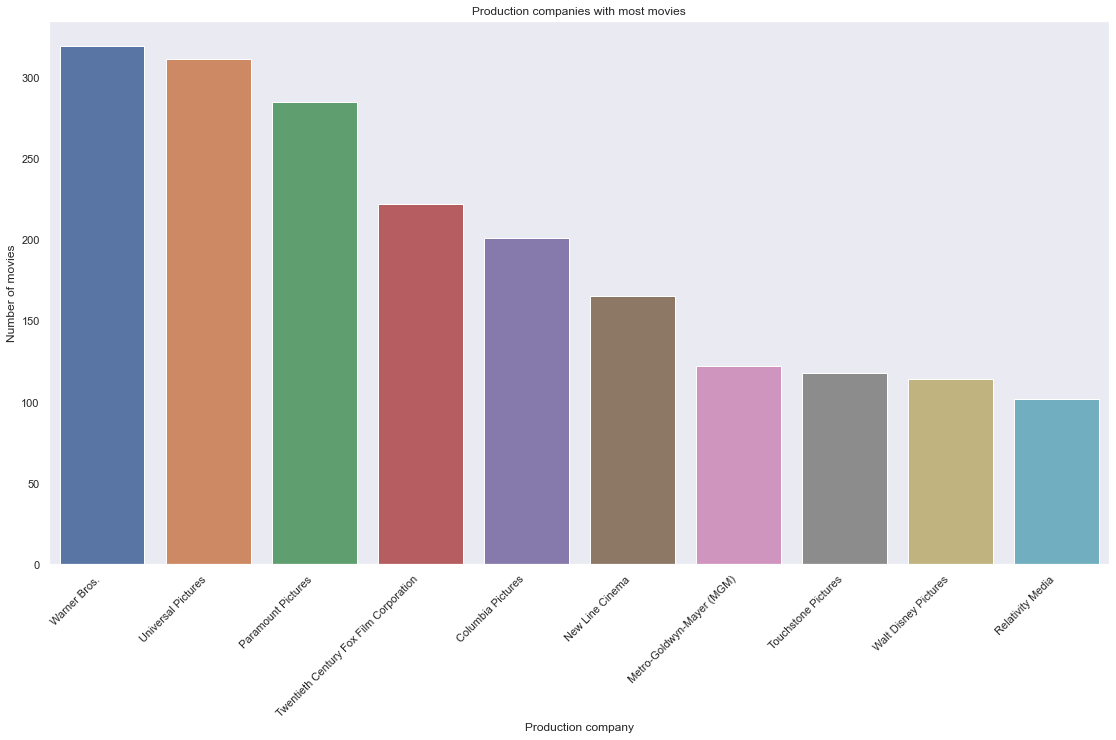

In [25]:
fig, ax = plt.subplots(figsize=(19,10))
df_prods.rename({'value':'prod_company'},axis=1,inplace=True)
top_10_prods = list(df_prods['prod_company'].value_counts().iloc[:10].index)
sns.countplot(x=df_prods['prod_company'], order=top_10_prods)
ax = ax.set_xticklabels(labels=top_10_prods, rotation=45, ha='right')
plt.title('Production companies with most movies')
plt.ylabel('Number of movies')
plt.xlabel('Production company')

In [26]:
df_prods_mean = df_prods.groupby(by='prod_company').mean()
df_prods_sum = df_prods.groupby(by='prod_company').sum()
df_prods_mean_top_10 = df_prods_mean[df_prods_mean.index.isin(top_10_prods)]
df_prods_sum_top_10 = df_prods_sum[df_prods_sum.index.isin(top_10_prods)]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_15884\3069372485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_prods_mean = df_prods.groupby(by='prod_company').mean()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_15884\3069372485.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_prods_sum = df_prods.groupby(by='prod_company').sum()


Text(0.5, 1.0, 'Average revenue for production companies with most movies')

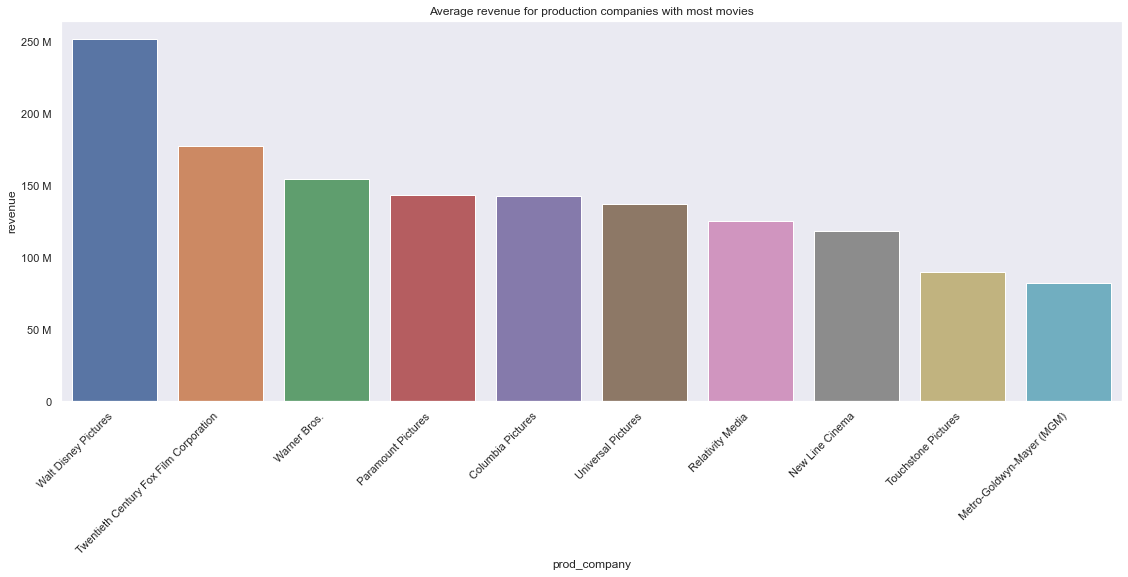

In [27]:


fig, ax = plt.subplots(1,1, figsize=(19,7))
sns.barplot( data=df_prods_mean_top_10,x=df_prods_mean_top_10.index,y='revenue',order=df_prods_mean_top_10['revenue'].sort_values(ascending=False).index)
ax.set_xticklabels(labels=df_prods_mean_top_10['revenue'].sort_values(ascending=False).index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Average revenue for production companies with most movies')


Text(0.5, 1.0, 'Total revenue for production companies with most movies')

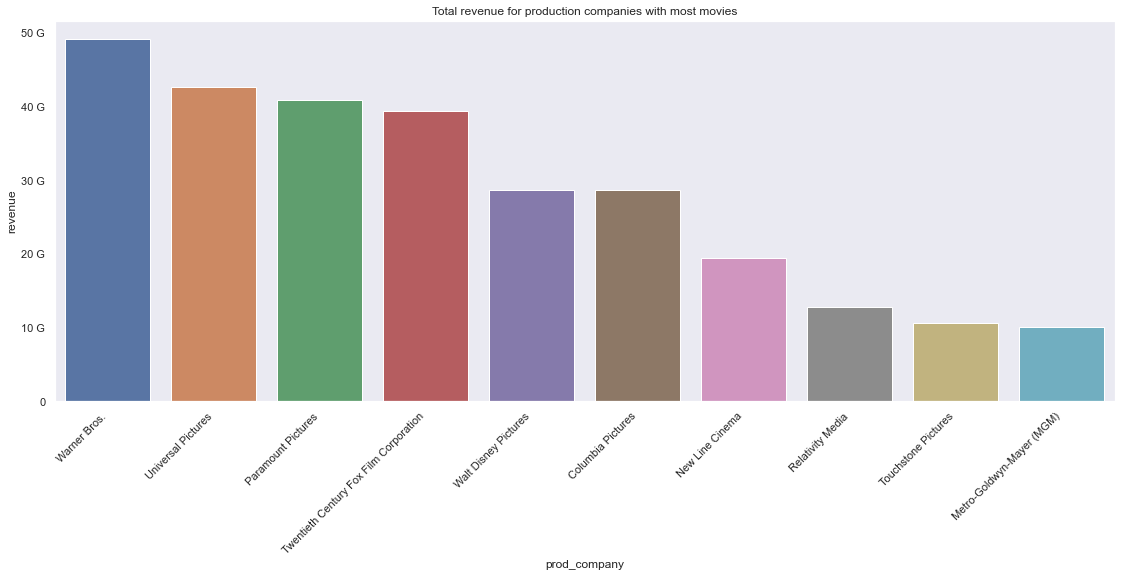

In [28]:
fig, ax = plt.subplots(figsize=(19,7))
sns.barplot(data=df_prods_sum_top_10,x=df_prods_sum_top_10.index,y='revenue',order=df_prods_sum_top_10['revenue'].sort_values(ascending=False).index)
ax.set_xticklabels(labels=df_prods_sum_top_10['revenue'].sort_values(ascending=False).index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Total revenue for production companies with most movies')


Text(0.5, 1.0, 'Average movie score for production companies with most movies')

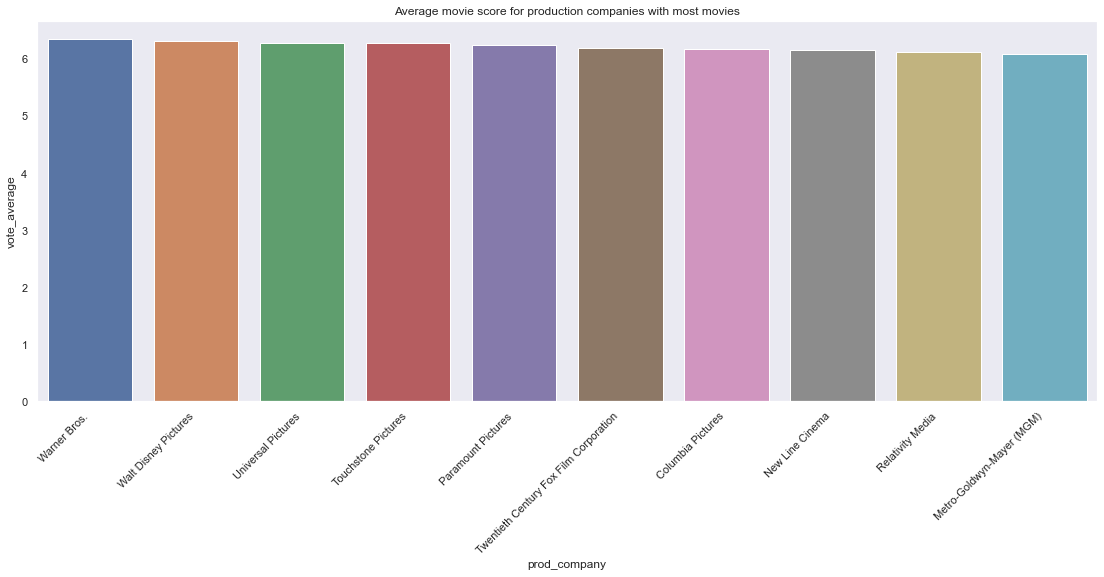

In [29]:
fig, ax = plt.subplots(figsize=(19,7))
sns.barplot(data=df_prods_mean_top_10,x=df_prods_mean_top_10.index,y='vote_average',order=df_prods_mean_top_10['vote_average'].sort_values(ascending=False).index)
ax.set_xticklabels(labels=df_prods_mean_top_10['vote_average'].sort_values(ascending=False).index, rotation=45, ha='right')
ax.set_title('Average movie score for production companies with most movies')


In [30]:
most_rev_prods = df_prods.groupby(by='prod_company').mean()['revenue'].sort_values(ascending=False)[:10]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_15884\832773617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_rev_prods = df_prods.groupby(by='prod_company').mean()['revenue'].sort_values(ascending=False)[:10]


Text(0.5, 1.0, 'Highest average revenue per movie per production company')

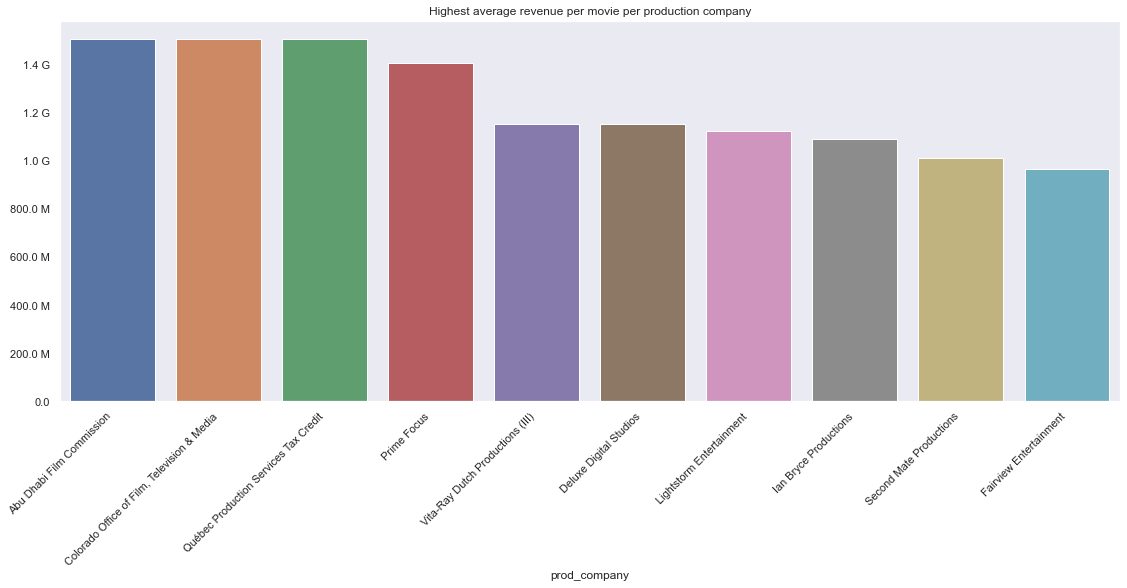

In [31]:
fmt = EngFormatter(places=1)
fig, ax = plt.subplots(figsize=(19,7))
sns.barplot(x=most_rev_prods.index,y=most_rev_prods.values)
ax.set_xticklabels(labels=most_rev_prods.index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Highest average revenue per movie per production company')


In [32]:
print(f"Abu Dhabi Film Commission movies: {df_prods[df_prods['prod_company']=='Abu Dhabi Film Commission']['title'].values}")
print(f"Colorado Office of Film, Television & Media movies: {df_prods[df_prods['prod_company']=='Colorado Office of Film, Television & Media']['title'].values}")
print(f"Québec Production Services Tax Credit movies: {df_prods[df_prods['prod_company']=='Québec Production Services Tax Credit']['title'].values}")
print(f"Prime Focus movies: {df_prods[df_prods['prod_company']=='Prime Focus']['title'].values}")
print(f"Vita-Ray Dutch Productions (III) movies: {df_prods[df_prods['prod_company']=='Vita-Ray Dutch Productions (III)']['title'].values}")

# print(df_prods[df_prods['prod_company']=='Colorado Office of Film, Television & Media']['title'])
# print(df_prods[df_prods['prod_company']=='Québec Production Services Tax Credit']['title'])
# print(df_prods[df_prods['prod_company']=='Prime Focus']['title'])
# print(df_prods[df_prods['prod_company']=='Vita-Ray Dutch Productions (III)']['title'])

Abu Dhabi Film Commission movies: ['Furious 7']
Colorado Office of Film, Television & Media movies: ['Furious 7']
Québec Production Services Tax Credit movies: ['Furious 7']
Prime Focus movies: ['Avengers: Age of Ultron']
Vita-Ray Dutch Productions (III) movies: ['Captain America: Civil War']


Text(0.5, 1.0, 'Movies with highest revenues')

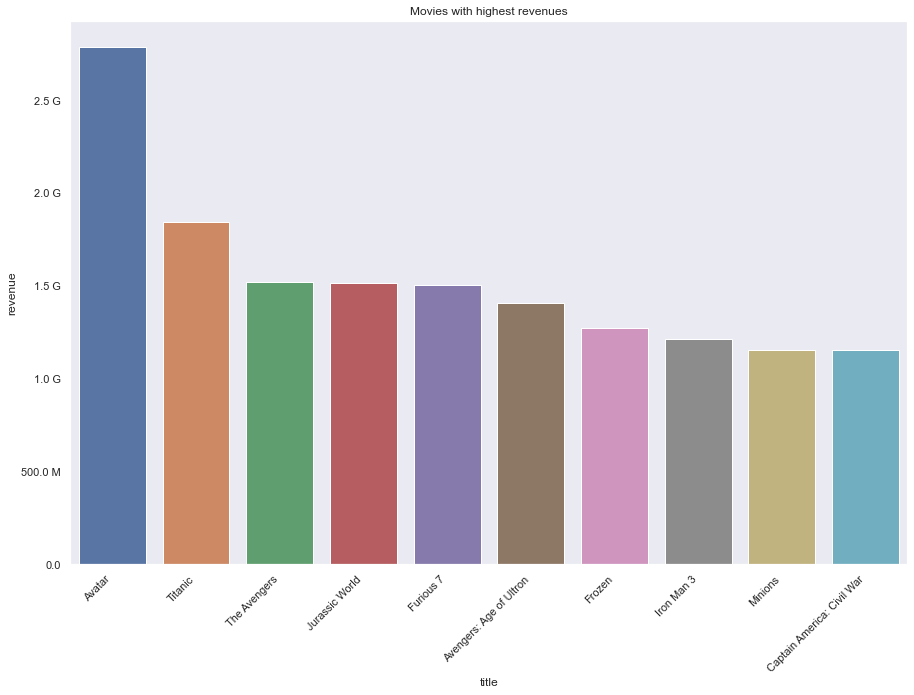

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=df,x='title',y='revenue', order=df[['title','revenue']].sort_values(by='revenue', ascending=False)['title'][:10])
ax.set_xticklabels(labels=df[['title','revenue']].sort_values(by='revenue', ascending=False)['title'][:10], rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Movies with highest revenues')

In [34]:
df['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4797    2005-03-12
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4505, dtype: object

In [35]:
df[df['release_date'].isnull()==True]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,cast,crew
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[]


In [36]:
df = df[df['release_date'].isnull()==False]

In [37]:
# df.columns
# df['release_date']
df['year'] = df['release_date'].apply(lambda x: x[:4])
# df.groupby('release_date').max()

In [38]:
df['vote_count'].median()

251.5

In [39]:
max_by_year = df[df['vote_count']>50].groupby(by='year').max()
avg_by_year = df[df['vote_count']>50].groupby(by='year').mean()


C:\Users\Daniel\AppData\Local\Temp\ipykernel_15884\3881056922.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_by_year = df[df['vote_count']>50].groupby(by='year').max()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_15884\3881056922.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_by_year = df[df['vote_count']>50].groupby(by='year').mean()


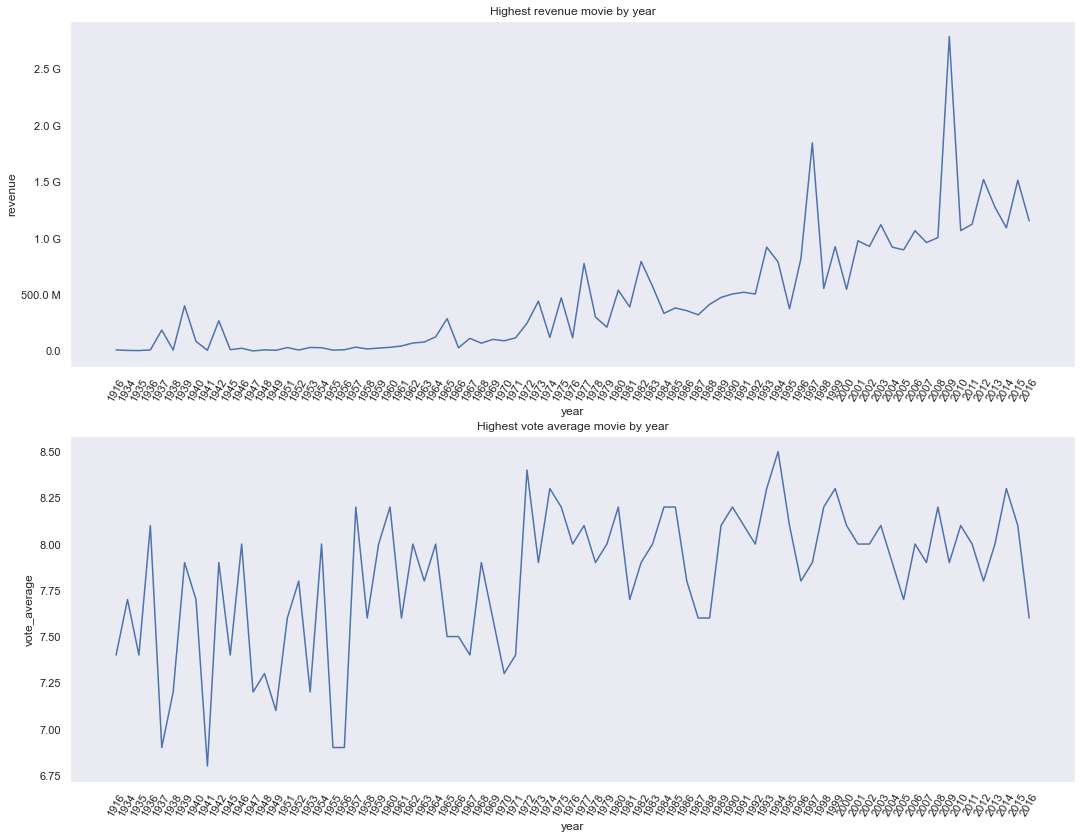

In [40]:
fig, ax = plt.subplots(2,1,figsize=(18,14))

sns.lineplot(ax=ax[0], data=max_by_year,x='year',y='revenue')
ax[0].set_title('Highest revenue movie by year')
ax[0].yaxis.set_major_formatter(fmt)

sns.lineplot(ax=ax[1], data=max_by_year,x='year',y='vote_average')
ax[1].set_title('Highest vote average movie by year')

ax[0].tick_params(axis='x', rotation=60)
ax[1].tick_params(axis='x', rotation=60)

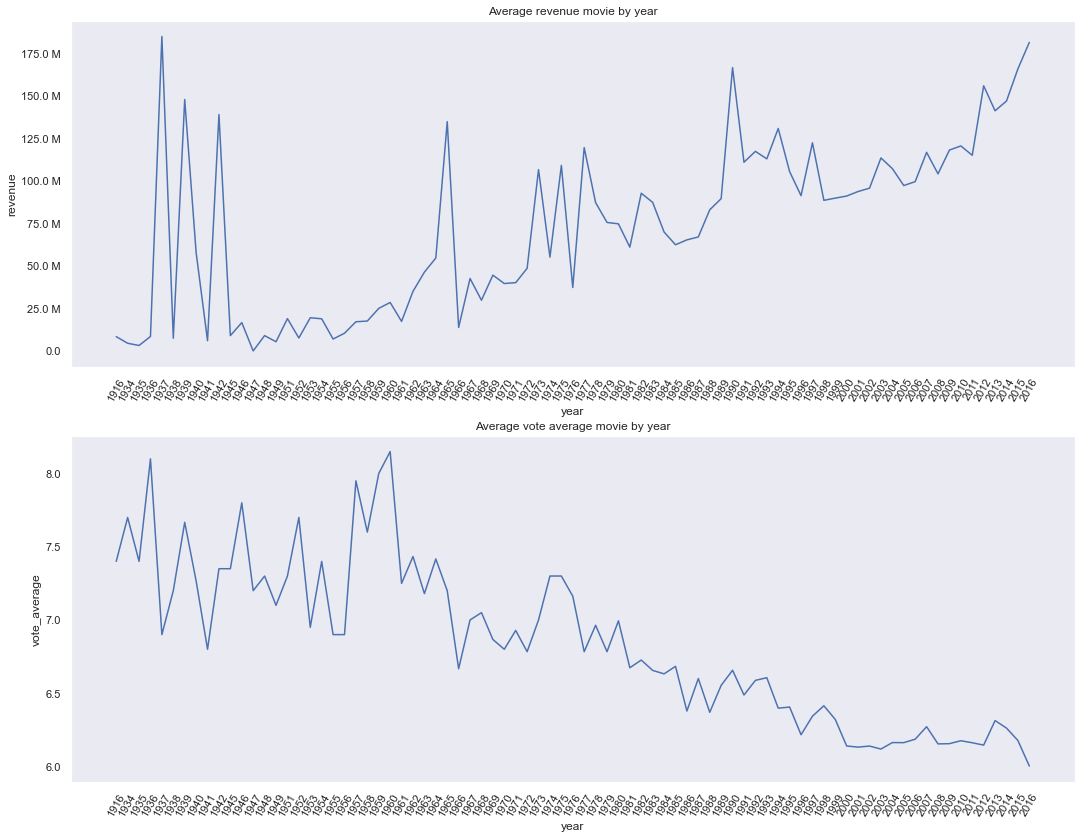

In [41]:
fig, ax = plt.subplots(2,1,figsize=(18,14))

sns.lineplot(ax=ax[0], data=avg_by_year,x='year',y='revenue')
ax[0].set_title('Average revenue movie by year')
ax[0].yaxis.set_major_formatter(fmt)

sns.lineplot(ax=ax[1], data=avg_by_year,x='year',y='vote_average')
ax[1].set_title('Average vote average movie by year')

ax[0].tick_params(axis='x', rotation=60)
ax[1].tick_params(axis='x', rotation=60)

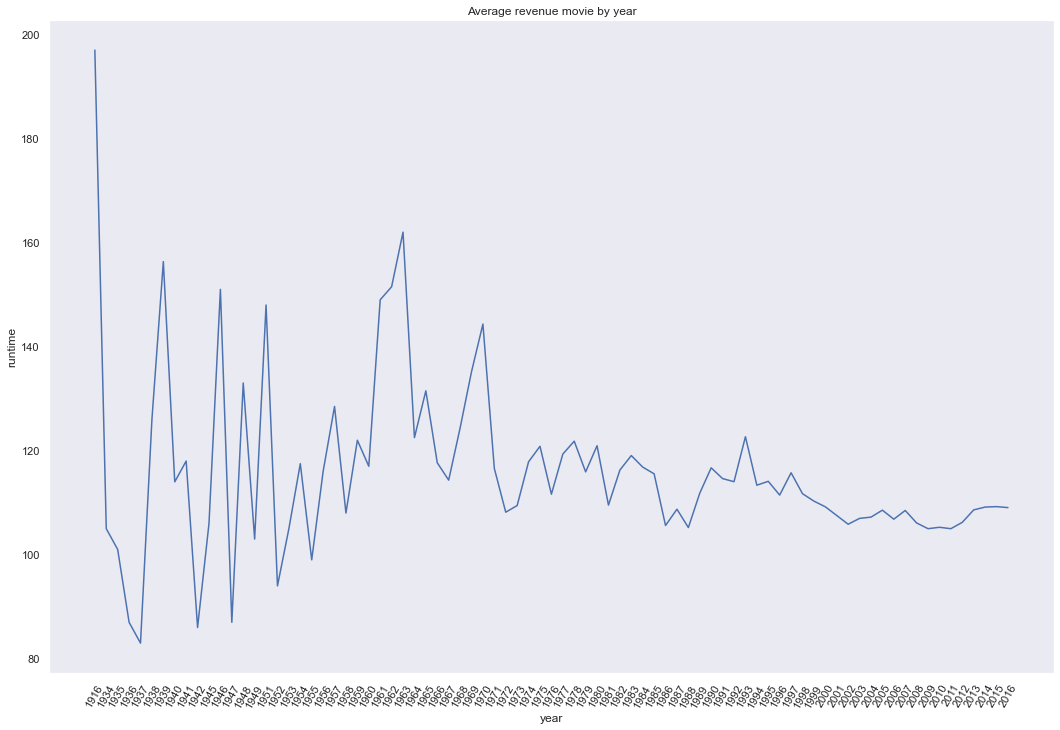

In [42]:
fig, ax = plt.subplots(figsize=(18,12))

sns.lineplot(data=avg_by_year,x='year',y='runtime')
ax.set_title('Average revenue movie by year')
ax.tick_params(axis='x', rotation=60)

In [43]:
df['status'].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [44]:
df[df['status']=='Rumored']['title']

4401         The Helix... Loaded
4453        Crying with Laughter
4508    The Harvest (La Cosecha)
4662              Little Big Top
4754               The Naked Ape
Name: title, dtype: object

In [45]:
df[df['status']=='Post Production']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,cast,crew,year
4169,1900000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,295886,[],en,Brotherly Love,West Philadelphia basketball star Sergio Taylo...,1.367751,[],...,Drama,NaN,NaN,NaN,NaN,NaN,NaN,"[{""cast_id"": 1, ""character"": ""Jackie Taylor"", ...","[{""credit_id"": ""54d3585cc3a3686ab90036ff"", ""de...",2015
4178,2000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",http://www.sonyclassics.com/higherground/,50875,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1157, ""n...",en,Higher Ground,A chronicle of one woman's lifelong struggle w...,1.699101,[],...,Drama,Thriller,NaN,NaN,NaN,NaN,NaN,"[{""cast_id"": 6, ""character"": ""Corinne Walker"",...","[{""credit_id"": ""52fe47dac3a36847f814bcb5"", ""de...",2011


In [46]:
def create_cast(movie):
    actors = eval(movie['cast'])
    for i, actor in enumerate(actors[0:10]):
        movie.loc[f'actor {i+1}'] = actor['name']
        movie.loc[f'actor {i+1} gender'] = actor['gender']
    return movie

df_cast = df.apply(lambda x: create_cast(x), axis=1)

In [47]:
actor_list = [f'actor {i}' for i in range(1,11)]
actor_list_gender = [f'actor {i} gender' for i in range(1,11)]
print(actor_list)

['actor 1', 'actor 2', 'actor 3', 'actor 4', 'actor 5', 'actor 6', 'actor 7', 'actor 8', 'actor 9', 'actor 10']


In [48]:
df_cast

,actor 1,actor 1 gender,actor 10,actor 10 gender,actor 2,actor 2 gender,actor 3,actor 3 gender,actor 4,actor 4 gender,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,Sam Worthington,2.0,Laz Alonso,2.0,Zoe Saldana,1.0,Sigourney Weaver,1.0,Stephen Lang,2.0,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,Johnny Depp,2.0,Tom Hollander,2.0,Orlando Bloom,2.0,Keira Knightley,1.0,Stellan Skarsgård,2.0,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,Daniel Craig,2.0,Rory Kinnear,2.0,Christoph Waltz,2.0,Léa Seydoux,1.0,Ralph Fiennes,2.0,...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,Christian Bale,2.0,Juno Temple,1.0,Michael Caine,2.0,Gary Oldman,2.0,Anne Hathaway,1.0,...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,Taylor Kitsch,2.0,Bryan Cranston,2.0,Lynn Collins,1.0,Samantha Morton,1.0,Willem Dafoe,2.0,...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2,2005
4799,Edward Burns,2.0,NaN,NaN,Kerry Bishé,1.0,Marsha Dietlein,1.0,Caitlin Fitzgerald,1.0,...,2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,2011
4800,Eric Mabius,2.0,NaN,NaN,Kristin Booth,1.0,Crystal Lowe,1.0,Geoff Gustafson,0.0,...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,2013
4801,Daniel Henney,2.0,NaN,NaN,Eliza Coupe,1.0,Bill Paxton,2.0,Alan Ruck,2.0,...,2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,2012


In [49]:
df_cast_2 = df_cast.melt(id_vars=df_cast.drop(actor_list,axis=1).columns, value_vars=(actor_list))

In [ ]:
df_cast_2['gender'] = df_cast_2.apply(lambda x: x[x['variable']+" gender"], axis=1)
df_cast_2.rename({"value":"actor_name"},inplace=True,axis=1)
df_cast_2.drop(actor_list_gender + 'variable',axis=1,inplace=True)

In [73]:
df_cast_2['gender'].value_counts()

2.0    24330
1.0    12127
0.0     5824
Name: gender, dtype: int64

In [141]:
df_cast_3 = df_cast_2[(df_cast_2['gender']!=0) & (df_cast_2['gender'].isnull()==False)]


In [144]:
df_cast_3.loc[:, 'gender'] = df_cast_3['gender'].replace([2.0, 1.0],['Male','Female'])

C:\Users\Daniel\AppData\Local\Temp\ipykernel_15884\1443529457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast_3.loc[:, 'gender'] = df_cast_3['gender'].replace([2.0, 1.0],['Male','Female'])


In [146]:
cast_sum = df_cast_3.groupby(by='actor_name').agg({'revenue':'sum', 'gender':'first'})
cast_avg = df_cast_3.groupby(by='actor_name').mean()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_15884\1295784179.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cast_avg = df_cast_3.groupby(by='actor_name').mean()


In [147]:
top_10_cast_sum = cast_sum.sort_values(by='revenue',ascending=False)[0:10]


Text(0.5, 1.0, 'Actors with highest revenue movies')

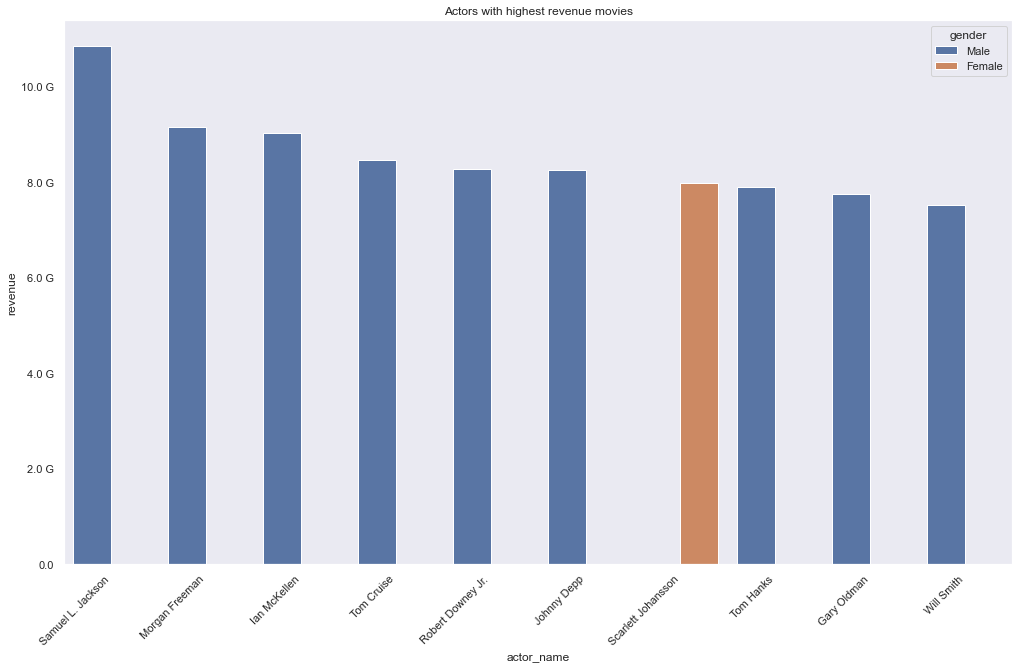

In [150]:
fig, ax = plt.subplots(figsize=(17,10))
sns.barplot(data=top_10_cast_sum, x=top_10_cast_sum.index, y='revenue', hue='gender')
ax.set_xticklabels(labels = top_10_cast_sum.index,  rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Actors with highest revenue movies')

In [ ]:
cast_avg